<a href="https://colab.research.google.com/github/boniluboni/PADROES-EM-ROUBOS-E-FURTOS-DE-VEICULOS/blob/main/EDA_e_Kmeans_Roubos_e_Furtos_de_ve%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Resumo do estudo


O estudo analisou roubos e furtos de veículos ocorridos em 2021 no Estado de São Paulo, utilizando dados da Secretaria de Segurança Pública (SSP), IBGE e SEFAZ.

Combinando variáveis como população, frota de veículos, investimentos em segurança e local dos crimes, a pesquisa buscou identificar padrões e fatores relacionados à criminalidade.

Técnicas como análise exploratória, correlação de Spearman, Análise de Correspondência Simples e o algoritmo de clusterização K-Means foram utilizadas.

Os resultados mostraram que os crimes tendem a ocorrer em dias e horários específicos e que cidades com maior atividade econômica, mas com investimentos desiguais em segurança, apresentam maiores índices de roubo e furto.

O estudo reforça a importância da análise de dados para a formulação de políticas públicas mais eficientes e para a alocação estratégica de recursos de segurança, considerando aspectos econômicos, sociais e demográficos.


Dados obtidos do IBGE, PNAD, SSP e SEFAZ, referentes a 2021.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


##Importação das bibliotecas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from IPython.display import HTML


Pré-processamento dos Dados
A base inicial continha 172 mil registros e 54 colunas sobre roubos e furtos de veículos, mas a análise foi focada apenas em automóveis, que representavam mais da metade dos casos. Devido à grande quantidade de dados ausentes e inconsistências, 50 colunas foram removidas — incluindo variáveis como cor, marca do veículo e dados da vítima — restando apenas 4 colunas e 10.777 registros. Segundo a literatura, variáveis com muitos dados faltantes podem prejudicar modelos analíticos. Após o pré-processamento, foram derivadas variáveis temporais a partir da data da ocorrência e adicionadas novas variáveis externas do IBGE (dados demográficos/geográficos) e da SEFAZ (investimentos em segurança), enriquecendo a base para análises mais profundas.

Análise Exploratória
A análise exploratória de dados visa compreender melhor os dados por meio de visualizações e estatísticas, sem hipóteses prévias. Segundo Mukhiya et al.
(2020) e Tukey (1977), essa etapa é essencial para identificar padrões, outliers e gerar hipóteses para análises futuras. Ela combina técnicas gráficas e estatísticas com flexibilidade e criatividade, servindo como base para decisões analíticas mais profundas.



##Tabela de varáveis:


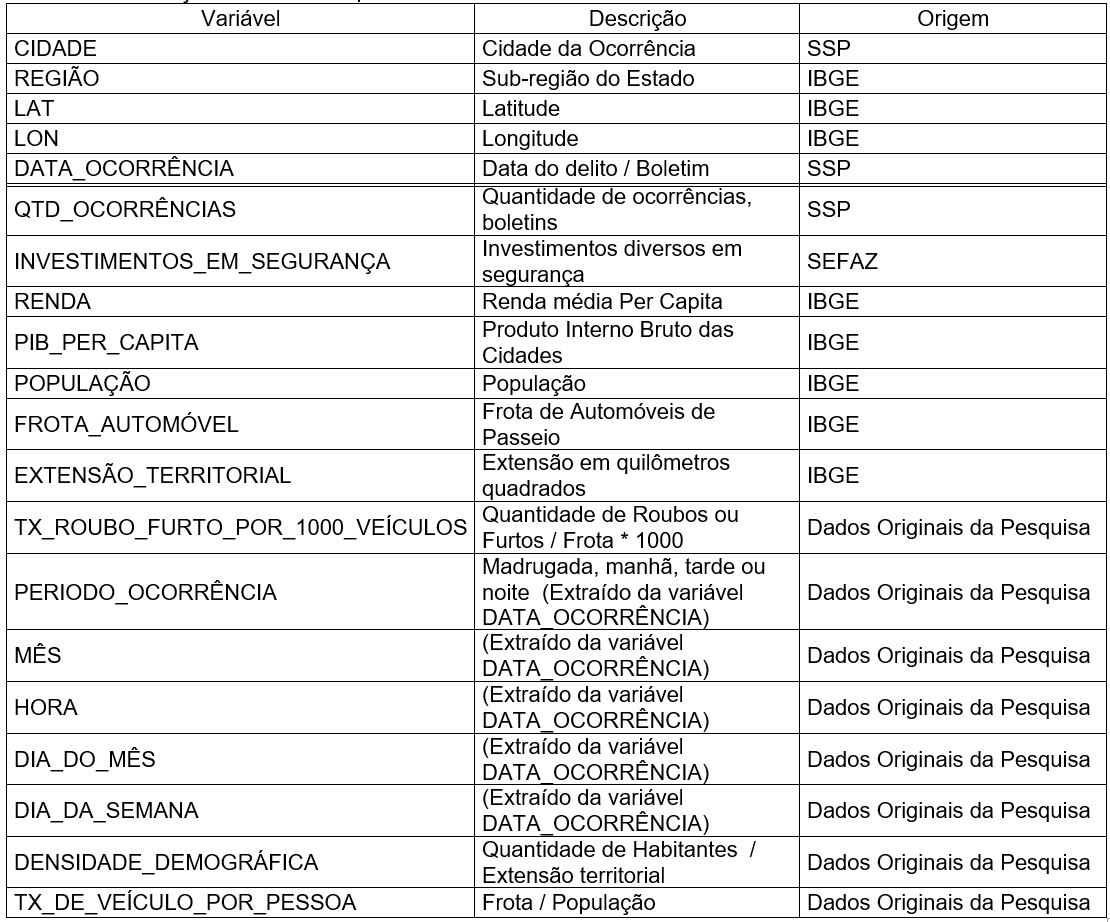

In [8]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/tabela.JPG', width=750)

##Horas do dia

In [ ]:
data = {
    "HORA": list(range(24)),
    "QT_CRIMES": [342, 251, 172, 127, 167, 380, 338, 258, 222, 282, 289, 269, 324, 320, 326, 352, 404, 464, 663, 1026, 1252, 1045, 895, 609]
}

# Criar um DataFrame
df = pd.DataFrame(data)


##Correlação

In [ ]:

# Teste de correlação e significância
correlation, correlation_p_value = spearmanr(df["HORA"], df["QT_CRIMES"])
if correlation_p_value < 0.05:
    correlation_significance = "estatisticamente significativa"
else:
    correlation_significance = "não estatisticamente significativa"

##Resultados da correlação

In [ ]:
# Resultados e interpretações
correlation_formatted = f"{correlation:.4f}"  # Modificação aqui para formato decimal
p_value_formatted = f"{correlation_p_value:.8f}"  # Formatação do p-valor de forma mais amigável

##Interpretação

In [ ]:
# Interpretação baseada nos resultados
interpretation = ""
if correlation > 0:
    interpretation = f"Existe uma correlação positiva ({correlation_formatted}) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a aumentar. Esta correlação é {correlation_significance}, com um p-valor de {p_value_formatted}, sugerindo que a relação observada não é devido ao acaso."
else:
    interpretation = f"Existe uma correlação negativa ({correlation_formatted}) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a diminuir. Esta correlação é {correlation_significance}, com um p-valor de {p_value_formatted}, sugerindo que a relação observada não é devido ao acaso."

print(interpretation)

Existe uma correlação positiva (0.7965) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a aumentar. Esta correlação é estatisticamente significativa, com um p-valor de 0.00000321, sugerindo que a relação observada não é devido ao acaso.


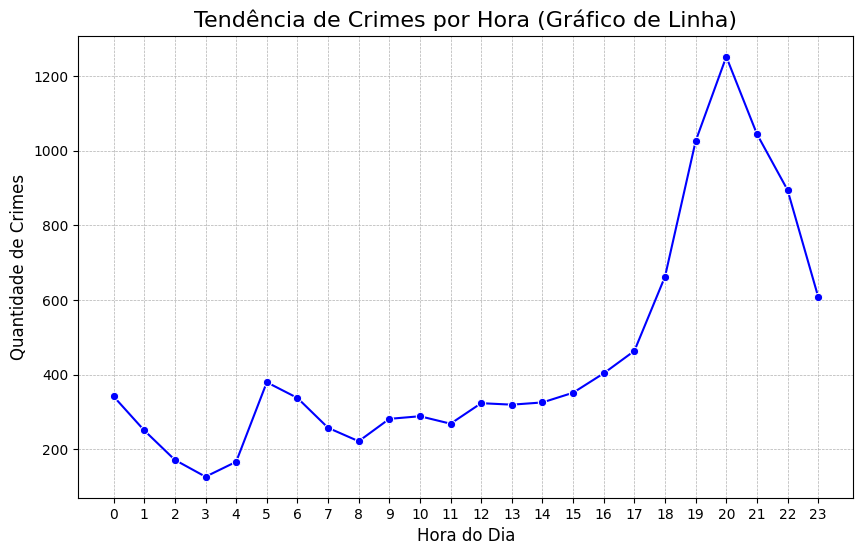

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. Definição dos Dados ---
data = {
    "HORA": list(range(24)),
    "QT_CRIMES": [342, 251, 172, 127, 167, 380, 338, 258, 222, 282, 289, 269, 324, 320, 326, 352, 404, 464, 663, 1026, 1252, 1045, 895, 609]
}
df = pd.DataFrame(data)

# --- 2. Criação de Uma Única Figura ---
plt.figure(figsize=(10, 6))

# --- Gráfico de Linha ---
sns.lineplot(x='HORA', y='QT_CRIMES', data=df, marker='o', color='b')
plt.title('Tendência de Crimes por Hora (Gráfico de Linha)', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Quantidade de Crimes', fontsize=12)
plt.xticks(df['HORA'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Exibe o gráfico
plt.show()